# **[Data4Life] - Introduction to Data Science**
Topic ***NBA*** - Group ***16***

## **Our motivation**
The NBA is one of the most popular sports leagues worldwide. It has been captivating millions of fans with its teams, players and storied history. Because of its popularity, it generate vast amount of data from game statistics to player achievements lead to create an excellent opportunity to apply data science techniques to analyze trends, identify patterns and derive meaningful insights.

Our works is designed to serve for **sports enthusiasts** who will gain a richer understanding of individual game performance and season-wide trends, **Team and League Stakeholders** who will use these insights for better decision-making and the last one, **data science community** who can learn about practical applications of data science in sports and inspiring further exploration in this field. (I hope that :>>)

## **Our purpose**
- Provide NBA fans, analysts and stakeholders with deeper insights into team and player performance through data-drive approaches.
- Assist coaches, managers or team owners in optimizing strategies and resources.
- Demonstrate how data science can be applied to a real-world context, showcasing the power of statistical analysis and machine learning in sports analytics.

## **Our key objective**

### **Title 0: Overview of the Current NBA Situation**
- Provide an initial analysis to contextualize the state of the NBA.
- Break down insights into three main categories:
   1. Players
   2. Teams
   3. Data Modelling

### **Title 1: Players**

**Objective 1: Identify high-performing and consistent players (2020-2025)**
- Focus on players with high performance and consistency in the past five years.
- Use Efficiency (EFF) as the primary metric:

$$EFF = \frac{(PTS+REB+AST+STL+BLK)−((FGA−FGM)+(FTA−FTM)+TO)}{GP}$$
​
Where:
- PTS: Points scored
- REB: Total rebounds (offensive + defensive)
- AST: Assists
- STL: Steals
- BLK: Blocks
- FGA, FGM: Field goals attempted and made
- FTA, FTM: Free throws attempted and made
- TO: Turnovers
- GP: Games played

Analyze EFF trends:
- Evaluate EFF variability across seasons
- Analyze EFF changes with age (does performance decline as players get older?)

**Objective 2: Identify Top-performing rookies (2024-2025)**
- Focus only on the current season to identify rookies with standout performances
- Key metrics: EFF, PTS, REB, AST

**Objective 3: Analyze player performance by position**
- Break down player performance based on their roles:
  - Defensive Players: Metric like REB, STL, BLK
  - Attackers (Scores): Metric like PTS, FG%, 3P%
  - Playmakers (Shooting/Passing): Metric like AST, FG%, 3P%, FT%

Approach: 
- Calculate averages and standard deviations for EFF across years for consistency
- Segment players by position (DEF, ATK, Playmaker)
- Compare rookies' performance against established players

### **Title 2: Teams**

**Objective: Analyze Team Weaknesses**
- Identify areas where teams are underperforming:
   - If a team has a low offensive score (ATK), recommend acquiring players strong in scoring metrics (e.g., PTS, FG%, 3P%)
   - If a team has a weak defense, focus on players with high REB, STL, BLK

Approach:
- Aggregate team-level metrics (e.g., average PTS, REB, STL) and compare them across the league
- Identify statistically significant deficiencies (e.g., below the league average)
- Recommend specific player profiles to address these weakness

### **Title 3: Data Modelling**

**Objective: Predict Future Performance**
- Develop a model to predict whether a player's performance will remain high in the next season
- Use player data from past seasons to build predictive models, incorporating:
   - EFF
   - Age
   - Historical trends in metrics like PTS, REB, AST, STL, BLK

Approach:
1. Feature Engineering
   - Create relevant features (e.g., age, position, past EFF trends)

2. Train Predictive Models
   - Models: Linear regression, random forest or Neural Networks
   - Evaluate performance using metrics like RMSE or MAE

3. Test the model
   - Validate predictions against current season data to ensure accuracy



### **IMPORT MODULES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
team_mapping = {
    "MIL": "MILWAUKEE BUCKS",
    "DEN": "DENVER NUGGETS",
    "OKC": "OKLAHOMA CITY THUNDER",
    "CHA": "CHARLOTTE HORNETS",
    "DAL": "DALLAS MAVERICKS",
    "BOS": "BOSTON CELTICS",
    "LAL": "LOS ANGELES LAKERS",
    "MIN": "MINNESOTA TIMBERWOLVES",
    "SAC": "SACRAMENTO KINGS",
    "PHX": "PHOENIX SUNS",
    "PHI": "PHILADELPHIA 76ERS",
    "NYK": "NEW YORK KNICKS",
    "ORL": "ORLANDO MAGIC",
    "MIA": "MIAMI HEAT",
    "DET": "DETROIT PISTONS",
    "SAS": "SAN ANTONIO SPURS",
    "TOR": "TORONTO RAPTORS",
    "LAC": "LA CLIPPERS",
    "CLE": "CLEVELAND CAVALIERS",
    "GSW": "GOLDEN STATE WARRIORS",
    "CHI": "CHICAGO BULLS",
    "MEM": "MEMPHIS GRIZZLIES",
    "ATL": "ATLANTA HAWKS",
    "WAS": "WASHINGTON WIZARDS",
    "IND": "INDIANA PACERS",
    "BKN": "BROOKLYN NETS",
    "HOU": "HOUSTON ROCKETS",
    "UTA": "UTAH JAZZ",
    "POR": "PORTLAND TRAIL BLAZERS",
    "NOP": "NEW ORLEANS PELICANS",
}

# Players

### **Title 1: Players**

**Objective 1: Identify high-performing and consistent players (2020-2025)**
- Focus on players with high performance and consistency in the past five years.
- Use Efficiency (EFF) as the primary metric:

$$EFF = \frac{(PTS+REB+AST+STL+BLK)−((FGA−FGM)+(FTA−FTM)+TO)}{GP}$$
​
Where:
- PTS: Points scored
- REB: Total rebounds (offensive + defensive)
- AST: Assists
- STL: Steals
- BLK: Blocks
- FGA, FGM: Field goals attempted and made
- FTA, FTM: Free throws attempted and made
- TO: Turnovers
- GP: Games played

Analyze EFF trends:
- Evaluate EFF variability across seasons
- Analyze EFF changes with age (does performance decline as players get older?)

### **LOAD DATASETS**

In [3]:
nba_roster = pd.read_csv("Data_NBA_1/nba_roster.csv")

nba_stats = pd.read_csv("Data_NBA_1/nba_stats.csv")

### **CLEAN DATA**

In [4]:
nba_roster.columns = nba_roster.columns.str.lower()

nba_stats.columns = nba_stats.columns.str.lower()

nba_roster = nba_roster.drop(
    columns=["school", "how acquired", "player link", "birthdate", "#"]
).rename(columns={"team name": "team"})

nba_stats = nba_stats.drop(columns="#")

nba_stats["team"] = nba_stats["team"].map(arg=team_mapping)

In [5]:
nba_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   player  2577 non-null   object
 1   pos     2576 non-null   object
 2   height  2577 non-null   object
 3   weight  2577 non-null   object
 4   age     2577 non-null   int64 
 5   exp     2577 non-null   object
 6   team    2577 non-null   object
 7   season  2577 non-null   object
dtypes: int64(1), object(7)
memory usage: 161.2+ KB


The exp (experience) column is expected to be numerical because it represents the number of years a player has played in the NBA. However, based on the information above, it appears to be a categorical value so we need to investigate what caused this problem.

In [6]:
nba_roster["exp"].unique()

array(['7', '15', '8', '4', '1', '2', 'R', '3', '17', '6', '14', '16',
       '5', '13', '9', '12', '10', '11', '18', '19', '21', '20'],
      dtype=object)

We need to identify all records that contain the **R** value in the **exp** column.

In [7]:
nba_roster[nba_roster["exp"] == "R"]

,player,pos,height,weight,age,exp,team,season
10,Anton Watson,F,6-8,225 lbs,24,R,BOSTON CELTICS,2024-25
15,Baylor Scheierman,G,6-6,205 lbs,24,R,BOSTON CELTICS,2024-25
24,Drew Peterson,F,6-9,205 lbs,24,R,BOSTON CELTICS,2023-24
27,Jordan Walsh,G,6-6,205 lbs,20,R,BOSTON CELTICS,2023-24
41,JD Davison,G,6-1,195 lbs,20,R,BOSTON CELTICS,2022-23
...,...,...,...,...,...,...,...,...
2548,Joe Wieskamp,G-F,6-6,205 lbs,22,R,SAN ANTONIO SPURS,2021-22
2550,DJ Stewart,G,6-5,205 lbs,22,R,SAN ANTONIO SPURS,2021-22
2558,Jock Landale,C,6-11,255 lbs,26,R,SAN ANTONIO SPURS,2021-22
2571,Devin Vassell,G-F,6-5,200 lbs,20,R,SAN ANTONIO SPURS,2020-21


Now, we pick a random player from the list (for example, **JD Davison**) to view all of his records.

In [8]:
nba_roster[nba_roster["player"] == "JD Davison"]

,player,pos,height,weight,age,exp,team,season
7,JD Davison,G,6-1,195 lbs,22,2,BOSTON CELTICS,2024-25
25,JD Davison,G,6-1,195 lbs,21,1,BOSTON CELTICS,2023-24
41,JD Davison,G,6-1,195 lbs,20,R,BOSTON CELTICS,2022-23


We can observe that **JD Davison**'s experience (**exp**) increases with each season from 2022 to 2025. In the 2024-2025 season, he has 2 years of experience, and in the 2023-2024 season, he has 1 year of experience.

From this, we can conclude that the R value in the exp column indicates that the player has no experience (or is a Rookie).

In [9]:
# Replace 'R' with 0
nba_roster["exp"] = nba_roster["exp"].replace("R", 0)

# Convert the 'exp' column to numeric
nba_roster["exp"] = pd.to_numeric(nba_roster["exp"])

In [10]:
nba_roster.describe()

,age,exp
count,2577.000000,2577.000000
mean,26.048118,4.309662
std,4.310360,4.088733
min,18.000000,0.000000
25%,23.000000,1.000000
50%,25.000000,3.000000
75%,29.000000,7.000000
max,43.000000,21.000000


In [11]:
nba_roster.duplicated().sum()

0

---------------

In [12]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  1215 non-null   object 
 1   team    1215 non-null   object 
 2   gp      1215 non-null   int64  
 3   min     1215 non-null   float64
 4   pts     1215 non-null   float64
 5   fgm     1215 non-null   float64
 6   fga     1215 non-null   float64
 7   fg%     1215 non-null   float64
 8   3pm     1215 non-null   float64
 9   3pa     1215 non-null   float64
 10  3p%     1215 non-null   float64
 11  ftm     1215 non-null   float64
 12  fta     1215 non-null   float64
 13  ft%     1215 non-null   float64
 14  oreb    1215 non-null   float64
 15  dreb    1215 non-null   float64
 16  reb     1215 non-null   float64
 17  ast     1215 non-null   float64
 18  stl     1215 non-null   float64
 19  blk     1215 non-null   float64
 20  tov     1215 non-null   float64
 21  eff     1215 non-null   float64
 22  

In [13]:
nba_stats.describe()

,gp,min,pts,fgm,fga,fg%,3pm,3pa,3p%,ftm,fta,ft%,oreb,dreb,reb,ast,stl,blk,tov,eff
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.00000,1215.000000,1215.000000,1215.000000,1215.00000,1215.000000,1215.000000,1215.000000
mean,58.381893,25.488807,12.220658,4.477449,9.486502,47.537284,1.387243,3.791276,33.477202,1.880247,2.397449,77.105103,1.07284,3.540658,4.611029,2.770700,0.81251,0.514897,1.410123,13.987407
std,19.516453,7.041780,6.425344,2.278638,4.723507,7.291400,0.941341,2.410177,11.104579,1.552589,1.894943,10.057341,0.81754,1.839349,2.456936,2.024198,0.35972,0.445535,0.831200,6.552675
min,17.000000,6.900000,1.200000,0.400000,0.500000,29.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.10000,0.600000,0.800000,0.200000,0.10000,0.000000,0.100000,1.700000
25%,54.000000,19.950000,7.400000,2.700000,5.900000,42.900000,0.700000,2.100000,31.500000,0.800000,1.100000,71.400000,0.50000,2.300000,2.900000,1.300000,0.60000,0.200000,0.800000,9.200000
50%,65.000000,26.100000,10.600000,3.900000,8.300000,46.000000,1.300000,3.600000,35.600000,1.400000,1.900000,78.600000,0.80000,3.200000,4.100000,2.100000,0.80000,0.400000,1.200000,12.700000
75%,72.000000,31.500000,16.000000,5.800000,12.500000,50.250000,2.000000,5.300000,38.900000,2.400000,3.100000,84.400000,1.40000,4.300000,5.600000,3.700000,1.00000,0.700000,1.800000,17.500000
max,84.000000,38.400000,33.900000,12.800000,24.800000,80.000000,5.300000,13.100000,100.000000,10.000000,12.300000,100.000000,4.70000,11.000000,14.700000,12.100000,3.00000,3.600000,4.800000,42.100000


In [14]:
nba_stats.duplicated().sum()

0

In [15]:
merged_data = pd.merge(
    nba_stats,
    nba_roster,
    how="left",
    left_on=["player", "team", "season"],
    right_on=["player", "team", "season"],
)

merged_data.isnull().sum()

player    0
team      0
gp        0
min       0
pts       0
fgm       0
fga       0
fg%       0
3pm       0
3pa       0
3p%       0
ftm       0
fta       0
ft%       0
oreb      0
dreb      0
reb       0
ast       0
stl       0
blk       0
tov       0
eff       0
season    0
pos       0
height    0
weight    0
age       0
exp       0
dtype: int64

In [16]:
merged_data.head(10)

,player,team,gp,min,pts,fgm,fga,fg%,3pm,3pa,...,stl,blk,tov,eff,season,pos,height,weight,age,exp
0,Giannis Antetokounmpo,MILWAUKEE BUCKS,23,35.2,32.7,12.8,20.8,61.4,0.1,0.7,...,0.6,1.6,3.3,36.7,2024-25,F,6-11,243 lbs,30,11
1,Nikola Jokić,DENVER NUGGETS,21,37.3,30.9,11.8,21.1,55.8,2.1,4.4,...,1.8,0.7,3.9,42.1,2024-25,C,6-11,284 lbs,29,9
2,Shai Gilgeous-Alexander,OKLAHOMA CITY THUNDER,26,34.5,30.5,10.7,20.8,51.3,2.1,6.2,...,2.0,1.0,2.7,31.3,2024-25,G,6-6,195 lbs,26,6
3,LaMelo Ball,CHARLOTTE HORNETS,20,33.7,30.4,10.5,24.8,42.1,4.5,13.1,...,1.4,0.2,4.3,25.2,2024-25,G,6-7,180 lbs,23,4
4,Luka Dončić,DALLAS MAVERICKS,20,37.0,28.9,10.1,21.9,45.9,3.6,10.0,...,2.1,0.5,3.5,31.3,2024-25,F-G,6-6,230 lbs,25,6
5,Jayson Tatum,BOSTON CELTICS,25,36.4,28.3,9.3,20.5,45.3,3.8,10.5,...,1.2,0.5,2.8,29.1,2024-25,F-G,6-8,210 lbs,26,7
6,Anthony Davis,LOS ANGELES LAKERS,25,35.3,27.8,10.1,18.9,53.4,0.7,2.4,...,1.2,2.0,2.2,32.9,2024-25,F-C,6-10,253 lbs,31,12
7,Anthony Edwards,MINNESOTA TIMBERWOLVES,25,35.9,26.2,9.2,20.3,45.4,4.3,10.2,...,1.3,0.6,3.1,22.4,2024-25,G,6-4,225 lbs,23,4
8,De'Aaron Fox,SACRAMENTO KINGS,27,37.3,26.2,9.7,20.2,48.3,2.0,6.3,...,1.6,0.3,3.5,24.2,2024-25,G,6-3,185 lbs,27,7
9,Damian Lillard,MILWAUKEE BUCKS,22,36.4,25.7,7.9,17.6,45.0,3.5,9.3,...,1.0,0.2,3.0,25.7,2024-25,G,6-2,195 lbs,34,12


### **GENERAL**

**Objective 1 - Question 1: Top 10 NBA players have the highest average eff (EFFICIENCY SCORE)?**

In [17]:
top_10_nba_player = (
    merged_data.groupby(by="player")
    .mean(numeric_only=True)
    .sort_values(by="eff", ascending=False)
    .head(10)
    .reset_index()
)


top_10_nba_player = top_10_nba_player[["player", "eff", "age"]]

top_10_nba_player

,player,eff,age
0,Nikola Jokić,38.640000,27.800000
1,Giannis Antetokounmpo,34.840000,28.000000
2,Joel Embiid,33.600000,28.000000
3,Anthony Davis,33.200000,31.000000
4,Luka Dončić,32.100000,23.800000
5,Shai Gilgeous-Alexander,31.333333,25.000000
6,Domantas Sabonis,30.740000,26.800000
7,LeBron James,28.450000,39.000000
8,Karl-Anthony Towns,28.033333,27.666667
9,Victor Wembanyama,27.950000,20.000000


**Objective 1 - Question 3: What is the age of top 10 NBA players?**

In [18]:
# Create a list of player names ordered by their rank in top_10_nba_player
top_10_nba_player_order = top_10_nba_player["player"].tolist()

# Convert the 'player' column in merged_data to a categorical type using the ordered player list
# This ensures that players are ordered in the same way as in top_10_nba_player
merged_data["player"] = pd.Categorical(
    merged_data["player"], categories=top_10_nba_player_order, ordered=True
)

# Filter the merged_data to keep only the rows where the 'player' is in the top_10_nba_player list
top_10_data = merged_data.loc[merged_data["player"].isin(top_10_nba_player["player"])]

# Sort the filtered data by the 'season' column in descending order (latest season first)
top_10_data_sorted = top_10_data.sort_values(by="season", ascending=False)

# Extract the 'season_year' from the 'season' column (the part before the '-')
# and convert it to numeric for easier sorting and manipulation
top_10_data_sorted["season_year"] = top_10_data_sorted["season"].apply(
    lambda x: x.split("-")[0]
)
top_10_data_sorted["season_year"] = pd.to_numeric(top_10_data_sorted["season_year"])

top_10_group = top_10_data_sorted.groupby(by="player", observed=False)

In [19]:
age_exp_df = top_10_group.agg({"age": "first"}).sort_values(by="age", ascending=False)

age_exp_df.reset_index()

,player,age
0,LeBron James,39
1,Anthony Davis,31
2,Giannis Antetokounmpo,30
3,Nikola Jokić,29
4,Joel Embiid,29
5,Karl-Anthony Towns,29
6,Domantas Sabonis,28
7,Shai Gilgeous-Alexander,26
8,Luka Dončić,25
9,Victor Wembanyama,20


**Objective 1 - Question 4: What is the experience of top 10 NBA players?**

In [20]:
exp_exp_df = top_10_group.agg({"exp": "first"}).sort_values(by="exp", ascending=False)

exp_exp_df.reset_index()

,player,exp
0,LeBron James,21
1,Anthony Davis,12
2,Giannis Antetokounmpo,11
3,Nikola Jokić,9
4,Karl-Anthony Towns,9
5,Domantas Sabonis,8
6,Joel Embiid,6
7,Luka Dončić,6
8,Shai Gilgeous-Alexander,6
9,Victor Wembanyama,1


**Objective 1 - Question 4: What is the correlation between eff, age and exp?**

In [22]:
top_10_data

correlation_data = top_10_data[["eff", "age", "exp"]].corr()

,player,team,gp,min,pts,fgm,fga,fg%,3pm,3pa,...,stl,blk,tov,eff,season,pos,height,weight,age,exp
0,Giannis Antetokounmpo,MILWAUKEE BUCKS,23,35.2,32.7,12.8,20.8,61.4,0.1,0.7,...,0.6,1.6,3.3,36.7,2024-25,F,6-11,243 lbs,30,11
1,Nikola Jokić,DENVER NUGGETS,21,37.3,30.9,11.8,21.1,55.8,2.1,4.4,...,1.8,0.7,3.9,42.1,2024-25,C,6-11,284 lbs,29,9
2,Shai Gilgeous-Alexander,OKLAHOMA CITY THUNDER,26,34.5,30.5,10.7,20.8,51.3,2.1,6.2,...,2.0,1.0,2.7,31.3,2024-25,G,6-6,195 lbs,26,6
4,Luka Dončić,DALLAS MAVERICKS,20,37.0,28.9,10.1,21.9,45.9,3.6,10.0,...,2.1,0.5,3.5,31.3,2024-25,F-G,6-6,230 lbs,25,6
6,Anthony Davis,LOS ANGELES LAKERS,25,35.3,27.8,10.1,18.9,53.4,0.7,2.4,...,1.2,2.0,2.2,32.9,2024-25,F-C,6-10,253 lbs,31,12
13,Karl-Anthony Towns,NEW YORK KNICKS,24,34.3,24.8,8.8,16.6,52.6,2.3,5.1,...,0.9,1.0,2.5,32.5,2024-25,C-F,7-0,248 lbs,29,9
18,Victor Wembanyama,SAN ANTONIO SPURS,21,32.3,23.6,8.6,18.2,47.3,3.0,8.9,...,1.1,3.5,3.6,28.8,2024-25,F-C,7-3,235 lbs,20,1
24,LeBron James,LOS ANGELES LAKERS,24,35.0,22.8,8.7,17.6,49.2,2.1,5.7,...,0.7,0.6,4.1,27.0,2024-25,F,6-9,250 lbs,39,21
30,Domantas Sabonis,SACRAMENTO KINGS,25,36.0,21.5,8.2,13.2,62.6,1.0,2.4,...,0.8,0.4,3.1,33.0,2024-25,F-C,6-10,240 lbs,28,8
265,Luka Dončić,DALLAS MAVERICKS,70,37.5,33.9,11.5,23.6,48.7,4.1,10.6,...,1.4,0.5,4.0,36.9,2023-24,F-G,6-7,230 lbs,25,5


**Objective 1 - Question 2: What does their eff (EFFICIENCY SCORE) trend look like through each season?**

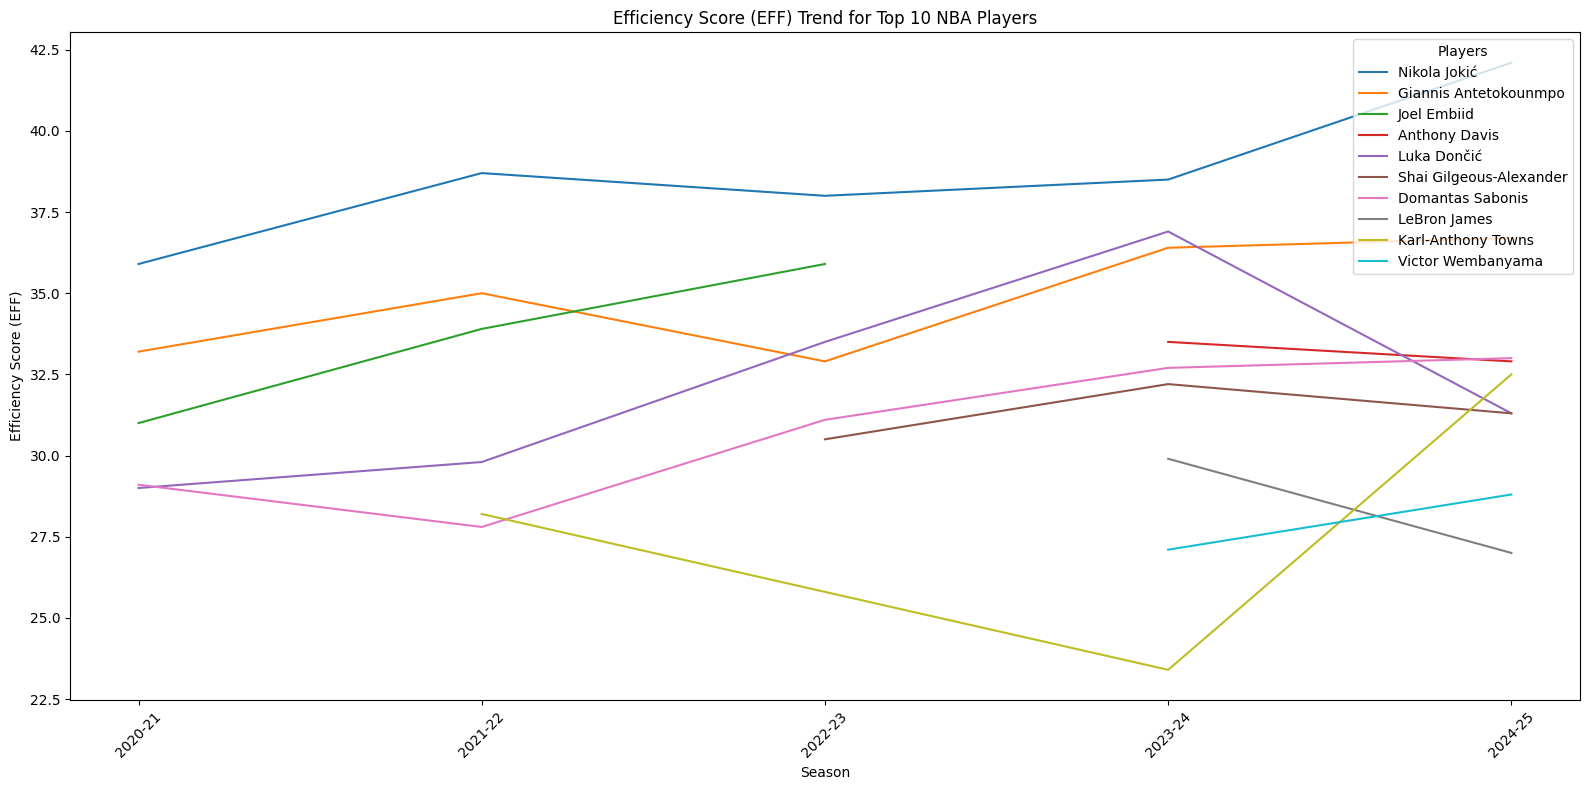

In [21]:
plt.figure(figsize=(16, 8))

for player, group in top_10_group:
    group_sorted = group.sort_values(by="season_year")  # Ensure seasons are sorted
    plt.plot(group_sorted["season_year"], group_sorted["eff"], label=player)

plt.title("Efficiency Score (EFF) Trend for Top 10 NBA Players")
plt.xlabel("Season")
plt.ylabel("Efficiency Score (EFF)")

plt.xticks(
    ticks=[
        2020,
        2021,
        2022,
        2023,
        2024,
    ],
    labels=[
        "2020-21",
        "2021-22",
        "2022-23",
        "2023-24",
        "2024-25",
    ],
    rotation=45,
)

plt.legend(title="Players", loc="upper right")
plt.tight_layout()
plt.show()